In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

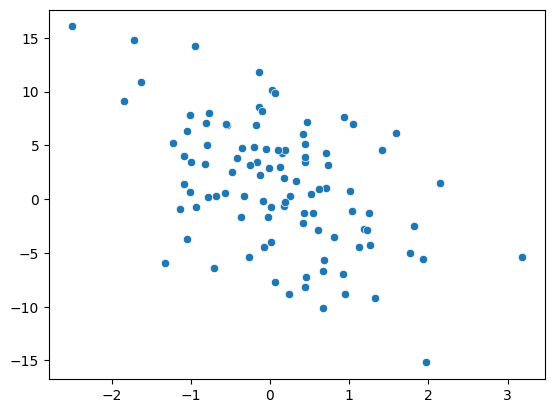

In [3]:
np.random.seed(23)
n_samples=100
x=np.random.normal(size=n_samples)
true_slope=-3
true_intercept=2
y=true_slope*x+true_intercept+np.random.normal(0,5,size=n_samples)
sns.scatterplot(x=x,y=y)
plt.show()

In [4]:
prior_mean=np.array([0,0])
prior_std=np.array([10,10])
likelihood_std=5


In [ ]:
def calculate_posterior(x,y,prior_mean,prior_std,likelihood_std):
    x_matrix=np.vstack([x,np.ones(len(x))]).T
    covariance_prior=np.diag(prior_std**2)
    covariance_likelihood=likelihood_std**2*np.identity(len(x))
    covariance_posterior=np.linalg.inv(np.linalg.inv(covariance_prior)+x_matrix.T@np.linalg.inv(covariance_likelihood)@x_matrix)
    mean_posterior=covariance_posterior@(np.linalg.inv(covariance_prior)@prior_mean+x_matrix.T@np.linalg.inv(covariance_likelihood)@y)
    